In [0]:
import tensorflow as tf
# 使用Eager Execution动态图机制
tf.enable_eager_execution()
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
data = datasets.load_iris(return_X_y=False)

In [0]:
# PCA
def pca(x,dim = 2):
    with tf.name_scope("PCA"):
        
        m,n= tf.to_float(x.get_shape()[0]),tf.to_int32(x.get_shape()[1])
        print(n)
        assert not tf.assert_less(dim,n)
        mean = tf.reduce_mean(x,axis=1)
        print(mean)
        x_new = x - tf.reshape(mean,(-1,1))
        cov = tf.matmul(x_new,x_new,transpose_a=True)/(m - 1) 
        e,v = tf.linalg.eigh(cov,name="eigh")
        e_index_sort = tf.math.top_k(e,sorted=True,k=dim)[1]
        v_new = tf.gather(v,indices=e_index_sort)
        pca = tf.matmul(x_new,v_new,transpose_b=True)
    return pca

In [0]:
pca_data = tf.constant(np.reshape(data.data,(data.data.shape[0],-1)),dtype=tf.float32)

In [117]:
pca_data = pca(pca_data,dim=2)

tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(
[2.5500002 2.375     2.35      2.35      2.5500002 2.8500001 2.425
 2.5249999 2.2250001 2.4       2.7       2.5000002 2.325     2.125
 2.8000002 3.        2.75      2.575     2.875     2.675     2.6750002
 2.675     2.35      2.6499999 2.5750003 2.45      2.6       2.6
 2.5500002 2.425     2.425     2.675     2.725     2.825     2.425
 2.4       2.625     2.5       2.225     2.55      2.525     2.1
 2.275     2.675     2.8       2.375     2.675     2.3500001 2.675
 2.4750001 4.075     3.9       4.1       3.275     3.85      3.575
 3.975     2.9       3.85      3.3       2.875     3.6499999 3.3
 3.775     3.35      3.8999999 3.65      3.4       3.6       3.275
 3.9250002 3.55      3.8000002 3.6999998 3.7250001 3.8500001 3.9500003
 4.1       3.725     3.1999998 3.2       3.15      3.4       3.85
 3.6       3.875     3.9999998 3.575     3.5       3.325     3.4250002
 3.775     3.3999999 2.9       3.45      3.5249999 3.525     3.6750002
 2.925

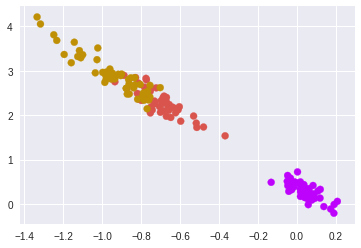

In [99]:
color_mapping = {0: sns.xkcd_rgb['bright purple'],\
        1: sns.xkcd_rgb['pale red'], 2: sns.xkcd_rgb['ochre']}
colors = list(map(lambda x: color_mapping[x], data.target))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=colors)
plt.show()